# Test : Analyse et Modélisation des prix de chaussures Mizuno

In [1]:
%matplotlib inline
import numpy as np #librairie servant à manipuler des matrices, ainsi que les fonctions mathématiques associées
import pandas as pd #librairie qui permet de manipuler facilement des données à analyser
import matplotlib.pyplot as plt #librairie qui permet de tracer des graphes
import seaborn as sns #librairie permettant de créer des graphiques statistiques 
import statsmodels.api as sm #librairie qui permet d'explorer les données, étudier et tester les modèles statistiques
import sklearn.linear_model as lm #librairie destinée à l'apprentissage automatique
from scipy import stats #méta-librairie unifiant plusieurs librairies à usage scientifique

In [2]:
#classe qui a pour but d'afficher les objets de type dataframe
class display(object):
    """Affichage d'une représentation HTML des objets"""
    
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

# Question 1

In [3]:
sport_Mizuno1 = pd.read_csv("data1.csv") #lecture du fichier contenant le dataset 1 grâce à pandas
sport_Mizuno2 = pd.read_csv("data2.csv") #lecture du fichier contenant le dataset 2 grâce à pandas

In [4]:
sport_Mizuno1.head() #aperçu intuitif du dataset 1, ce qui nous donne une idée des données à traiter

,names,prices,source,is_male
0,MIZUNO Wave Ultima 9 Femme Bleu / Blanc / Rose,135,from_running,0
1,MIZUNO WAVE DAICHI 4 Homme | Blue Sapphire / E...,125,from_running,1
2,MIZUNO WAVE SHADOW 2 Homme | Blue Jewel/Silver...,130,from_running,1
3,MIZUNO WAVE ULTIMA 11 Homme | Dress Blues / Va...,135,from_running,1
4,MIZUNO WAVE MUJIN 5 Homme Ombre Blue/Silver/Po...,145,from_running,1


In [5]:
sport_Mizuno1.head() #aperçu intuitif du dataset 2, ce qui nous donne une idée des données à traiter

,names,prices,source,is_male
0,MIZUNO Wave Ultima 9 Femme Bleu / Blanc / Rose,135,from_running,0
1,MIZUNO WAVE DAICHI 4 Homme | Blue Sapphire / E...,125,from_running,1
2,MIZUNO WAVE SHADOW 2 Homme | Blue Jewel/Silver...,130,from_running,1
3,MIZUNO WAVE ULTIMA 11 Homme | Dress Blues / Va...,135,from_running,1
4,MIZUNO WAVE MUJIN 5 Homme Ombre Blue/Silver/Po...,145,from_running,1


In [6]:
display('sport_Mizuno1', 'sport_Mizuno2') #affichage complet des deux dataset

,names,prices,source,is_male
0,MIZUNO Wave Ultima 9 Femme Bleu / Blanc / Rose,135,from_running,0
1,MIZUNO WAVE DAICHI 4 Homme | Blue Sapphire / E...,125,from_running,1
2,MIZUNO WAVE SHADOW 2 Homme | Blue Jewel/Silver...,130,from_running,1
3,MIZUNO WAVE ULTIMA 11 Homme | Dress Blues / Va...,135,from_running,1
4,MIZUNO WAVE MUJIN 5 Homme Ombre Blue/Silver/Po...,145,from_running,1
5,MIZUNO WAVE RIDER 22 Homme | cherryTomato/whit...,145,from_running,1
6,MIZUNO Wave Horizon Femme Bleu / Jaune,180,from_mizuno,0
7,MIZUNO WAVE MUJIN Femme 5 Bird of Paradise/Sil...,145,from_mizuno,0
8,MIZUNO WAVE RIDER 23 Homme | Campanula / Vapor...,145,from_mizuno,1
9,MIZUNO Wave Ultima 9 Homme Noir / Blanc / Bleu...,135,from_running,1


# Question 2

In [7]:
sport_Mizuno = pd.concat([sport_Mizuno1, sport_Mizuno2]) #concaténation des deux tables de données grâce à pandas

In [8]:
display('sport_Mizuno') #affichage du dataset concaténé

,names,prices,source,is_male
0,MIZUNO Wave Ultima 9 Femme Bleu / Blanc / Rose,135,from_running,0
1,MIZUNO WAVE DAICHI 4 Homme | Blue Sapphire / E...,125,from_running,1
2,MIZUNO WAVE SHADOW 2 Homme | Blue Jewel/Silver...,130,from_running,1
3,MIZUNO WAVE ULTIMA 11 Homme | Dress Blues / Va...,135,from_running,1
4,MIZUNO WAVE MUJIN 5 Homme Ombre Blue/Silver/Po...,145,from_running,1
5,MIZUNO WAVE RIDER 22 Homme | cherryTomato/whit...,145,from_running,1
6,MIZUNO Wave Horizon Femme Bleu / Jaune,180,from_mizuno,0
7,MIZUNO WAVE MUJIN Femme 5 Bird of Paradise/Sil...,145,from_mizuno,0
8,MIZUNO WAVE RIDER 23 Homme | Campanula / Vapor...,145,from_mizuno,1
9,MIZUNO Wave Ultima 9 Homme Noir / Blanc / Bleu...,135,from_running,1


# Question 3

In [9]:
sport_Mizuno.groupby('source')['names'].count() #comptage du nombre d'observations pour chaque source

source
from_mizuno     20
from_running    27
Name: names, dtype: int64

# Question 4

In [10]:
sport_Mizuno["prices"].mean() #calcul de la moyenne des prix de l'ensemble des articles

142.7659574468085

In [11]:
sport_Mizuno["prices"].median() #calcul de la médiane des prix de l'ensemble des articles

145.0

In [12]:
sport_Mizuno["prices"].describe() #calcul des principales statistiques des prix de l'ensemble des articles

count     47.000000
mean     142.765957
std       14.773968
min      120.000000
25%      135.000000
50%      145.000000
75%      145.000000
max      180.000000
Name: prices, dtype: float64

# Question 5

In [13]:
sport_Mizuno.columns #on prend connaissance des colonnes de la matrice

Index(['names', 'prices', 'source', 'is_male'], dtype='object')

In [14]:
sport_Mizuno.axes #on prend connaissance de l'index du dataframe 

[Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24,  0,  1,  2,  3,  4,  5,  6,  7,  8,
              9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
            dtype='int64'),
 Index(['names', 'prices', 'source', 'is_male'], dtype='object')]

In [15]:
sport_Mizuno.shape #on prend connaissance des dimensions (forme) de la matrice

(47, 4)

<AxesSubplot:xlabel='prices'>

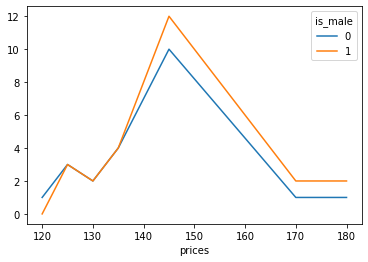

In [16]:
pd.crosstab(sport_Mizuno.prices,sport_Mizuno.is_male).plot() #on affiche sous forme de courbe la fréquence d'apparition 
#des prix du dataset en fonction de l'attribut booléen is_male

<AxesSubplot:xlabel='prices'>

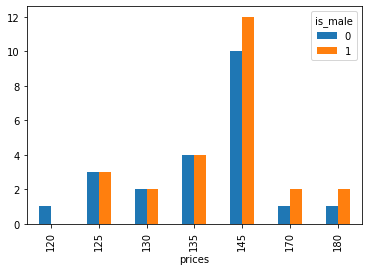

In [17]:
pd.crosstab(sport_Mizuno.prices,sport_Mizuno.is_male).plot(kind='bar') #on affiche sous forme de bar la 
#fréquence d'apparition des prix du dataset en fonction de l'attribut booléen is_male

In [18]:
sport_Mizuno.is_male.value_counts() #on compte combien de is_male compte le dataset


1    25
0    22
Name: is_male, dtype: int64

In [19]:
sport_Mizuno.prices.value_counts() #on compte combien de fois chaque modèle est représenté

145    22
135     8
125     6
130     4
180     3
170     3
120     1
Name: prices, dtype: int64

<AxesSubplot:ylabel='is_male'>

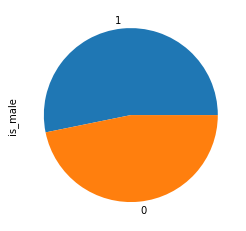

In [20]:
sport_Mizuno.is_male.value_counts().plot(kind='pie') #on affiche sous forme de camembert la fréquence d'apparition 
#de chaque élément is_male

<AxesSubplot:ylabel='prices'>

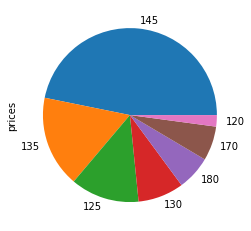

In [21]:
sport_Mizuno.prices.value_counts().plot(kind='pie') #on affiche sous forme de camembert la fréquence d'apparition
#des prix 

<AxesSubplot:ylabel='source'>

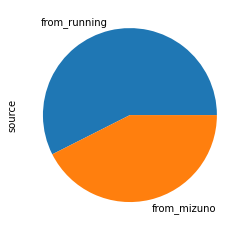

In [22]:
sport_Mizuno.source.value_counts().plot(kind='pie') #on affiche sous forme de camembert la fréquence d'apparition
#des sources 

# Question 6

In [23]:
#on utilise comme demandé la librairie statsmodels (sm)


#on veut déterminer is_male à partir de prices
#on construit le sous-ensemble du dataframe
c_sm = sm.add_constant(sport_Mizuno['prices'].values) 
model_sm = sm.OLS(sport_Mizuno['is_male'], c_sm)


#on applique le modèle au jeu de données retenu
fit_sm = model_sm.fit()

#on affiche les résultats
print(fit_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                is_male   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8199
Date:                Sun, 01 Aug 2021   Prob (F-statistic):              0.370
Time:                        14:02:43   Log-Likelihood:                -33.592
No. Observations:                  47   AIC:                             71.18
Df Residuals:                      45   BIC:                             74.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1200      0.724     -0.166      0.8

In [24]:
#on veut déterminer prices à partir de is_male
#on construit le sous-ensemble du dataframe
c_sm = sm.add_constant(sport_Mizuno['is_male'].values) 
model_sm = sm.OLS(sport_Mizuno['prices'], c_sm)


#on applique le modèle au jeu de données retenu
fit_sm = model_sm.fit()

#on affiche les résultats
print(fit_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 prices   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8199
Date:                Sun, 01 Aug 2021   Prob (F-statistic):              0.370
Time:                        14:02:43   Log-Likelihood:                -192.33
No. Observations:                  47   AIC:                             388.7
Df Residuals:                      45   BIC:                             392.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        140.6818      3.156     44.576      0.0

In [25]:
# dans cet exemple on souhaite déterminer prices à partir des trois autres caractéristiques (names, sources, is_male)

from patsy import dmatrices
# étant donné que le dataframe contient des chaînes de caractères, on utilise la librairie patsy et la fonction dmatrices
#qui permet de transformer notre dataset en numériques pour pouvoir utiliser la régression
y, X = dmatrices('prices ~ names + source + is_male', data=sport_Mizuno, return_type='dataframe') 
mod = sm.OLS(y, X)    
res = mod.fit()       
print(res.summary())  

                            OLS Regression Results                            
Dep. Variable:                 prices   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 01 Aug 2021   Prob (F-statistic):                nan
Time:                        14:02:43   Log-Likelihood:                 1324.9
No. Observations:                  47   AIC:                            -2556.
Df Residuals:                       0   BIC:                            -2469.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

/srv/conda/envs/notebook/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/srv/conda/envs/notebook/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/srv/conda/envs/notebook/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [26]:
# interprétation des résultats

# j'ai volontairement utilisé les deux premiers modèles qui ne sont pas pertinents dans la réalité (déterminer prices 
# à partir de is_male, ou déterminer is_male à partir de prices), ce que l'on remarque dans les résultats. 
# En revanche, dans le dernier exemple, où l'on a essayé de déterminer le prix à partir des trois autres caractéristiques
# le résultat du test est excellent.

# Question 7

In [38]:
y_sport_Mizuno, X_sport_Mizuno = dmatrices('prices ~ names + source + is_male', data=sport_Mizuno, return_type='dataframe') 

In [39]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


Xtrain, Xtest, ytrain, ytest = train_test_split(X_sport_Mizuno, y_sport_Mizuno,
                                                random_state=1)

In [40]:
from sklearn.naive_bayes import GaussianNB # 1. choix de l'algorithme
model = GaussianNB()                       # 2. instanciation du modèle
model.fit(Xtrain, ytrain)                  # 3. application du modèle aux données
y_model = model.predict(Xtest)             # 4. prédiction des tests

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [41]:
print(classification_report(ytest,y_model))

              precision    recall  f1-score   support

       120.0       0.00      0.00      0.00         1
       125.0       0.00      0.00      0.00         1
       130.0       0.00      0.00      0.00         1
       135.0       0.00      0.00      0.00         2
       145.0       0.00      0.00      0.00         5
       170.0       0.00      0.00      0.00         1
       180.0       0.20      1.00      0.33         1

    accuracy                           0.08        12
   macro avg       0.03      0.14      0.05        12
weighted avg       0.02      0.08      0.03        12



/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(Xtrain, ytrain)                 
y_model = model.predict(Xtest) 

In [43]:
print(classification_report(ytest,y_model))

              precision    recall  f1-score   support

       120.0       0.00      0.00      0.00         1
       125.0       0.00      0.00      0.00         1
       130.0       0.00      0.00      0.00         1
       135.0       0.00      0.00      0.00         2
       145.0       0.33      0.60      0.43         5
       170.0       0.00      0.00      0.00         1
       180.0       0.00      0.00      0.00         1

    accuracy                           0.25        12
   macro avg       0.05      0.09      0.06        12
weighted avg       0.14      0.25      0.18        12



/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# interprétation des résultats

# pour tester la librairie scikit-learn, j'ai choisi de comparer 2 algortihmes : GaussianNB et DecisionTree.
# j'ai généré une synthèse des résultats des tests à partir de la proportion retenue du dataset pour l'entraînement.
# on peut remarquer que le premier algorithme (GaussianNB) est d'une précision d'environ 40%.
# néanmoins, DecisionTree est de l'ordre de 20%.

# Comme première conclusion, le premier algorithme est plus performant que le deuxième.
# en revanche, les deux algorithmes ont des précisions pas très élevées (40% et 20%).
# Comme deuxième conclusion, cela est tout à fait normal étant donné la quantité de données sur laquelle est portée 
# l'apprentissage.
# En dernière conclusion, relative à DecisionTree, son mauvais score est probablement lié à la nature des données, qui 
# n'est pas forcément d'une structure hiérarchique.